# View controller

View control for searchers launched in s5_embedded_trials.ipynb.

### Searcher monitoring

In [2]:
%reset -f
from search import embedded

# list active searchers
embedded.search_status(smln_id='smln_0', recent=60)

The following searchers were active in the last 0 s:


No searchers were suspended by errors.


In [49]:
# read optional error message
embedded.read_search_error(searcher_id=5)

No error found in searcher 5.


### Results scatter plot

In [39]:
%reset -f
%matplotlib inline

import aux
from db.d_models import EmbeddedTrial as T
from search import embedded_viz

import PARAMETERS as P
from search import embedded_global as C


pre = {
    'w_n_pc_ec_vs_dist': aux.load(C.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C.PATH_V_G_N_VS_W_N_PC_EC_FR_EC)
}

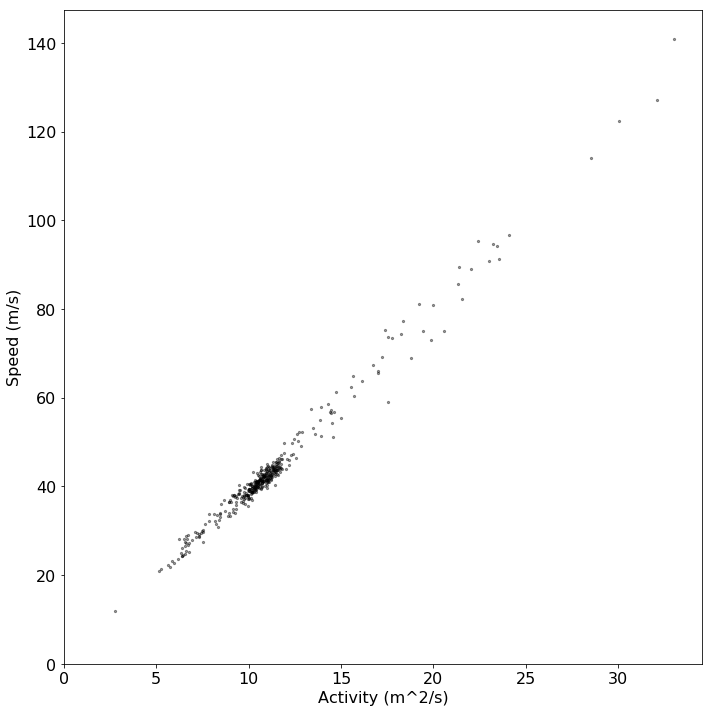

In [45]:
embedded_viz.rslt_scatter(
    smln_id='smln_0',
    filt=[T.stability > 0.5],
    lmt=10000, c='k', s=5, alpha=.4);

### Fast trial lookup

In [43]:
embedded_viz.select_trials(
    smln_id='smln_0',
    filt=[T.stability > 0.5, T.speed < 30], order_by='speed', lmt=15
    )[[
        'id', 'stability', 'speed', 'p_inh', 'rho_pc', 'z_pc', 'l_pc', 'w_a_pc_pc', 'p_a_inh_pc',
        'w_a_inh_pc', 'p_g_pc_inh', 'w_g_pc_inh', 'fr_ec'
    ]]

,id,stability,speed,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec
0,765,0.666667,11.843282,0.100217,12002.661298,0.999284,0.034986,0.008509,0.100006,0.009008,0.020000,0.003015,34.988142
1,799,1.000000,20.815268,0.088693,3301.171608,0.801405,0.046386,0.009744,0.097478,0.003539,0.084746,0.015526,38.596852
2,719,0.666667,21.340094,0.072952,2974.448350,1.227046,0.046181,0.007766,0.076751,0.006377,0.051146,0.013146,34.134349
3,580,0.666667,21.815242,0.082968,3022.295538,1.093062,0.055586,0.006799,0.077361,0.006765,0.082198,0.010821,37.227422
4,622,0.666667,22.236792,0.090999,2969.868591,1.021357,0.054284,0.006440,0.084929,0.006404,0.048600,0.006296,38.113206
5,850,0.666667,22.684718,0.092177,3108.977159,1.115979,0.045309,0.009530,0.071354,0.007834,0.052595,0.015731,41.605678
6,70,0.666667,23.159257,0.082968,3022.295538,1.093062,0.055586,0.006799,0.077361,0.006765,0.082198,0.010821,37.227422
7,568,1.000000,23.649300,0.082968,3022.295538,1.093062,0.055586,0.006799,0.077361,0.006765,0.082198,0.010821,37.227422
8,578,0.666667,24.379838,0.082968,3022.295538,1.093062,0.055586,0.006799,0.077361,0.006765,0.082198,0.010821,37.227422
9,576,1.000000,24.408471,0.082968,3022.295538,1.093062,0.055586,0.006799,0.077361,0.006765,0.082198,0.010821,37.227422


### Example trials

RSLTS:
{'STABILITY': 0.66666666666666663, 'ANGLE': -0.098738779080562458, 'ACTIVITY': 2.7683152688443076, 'SPEED': 11.843282186485293}


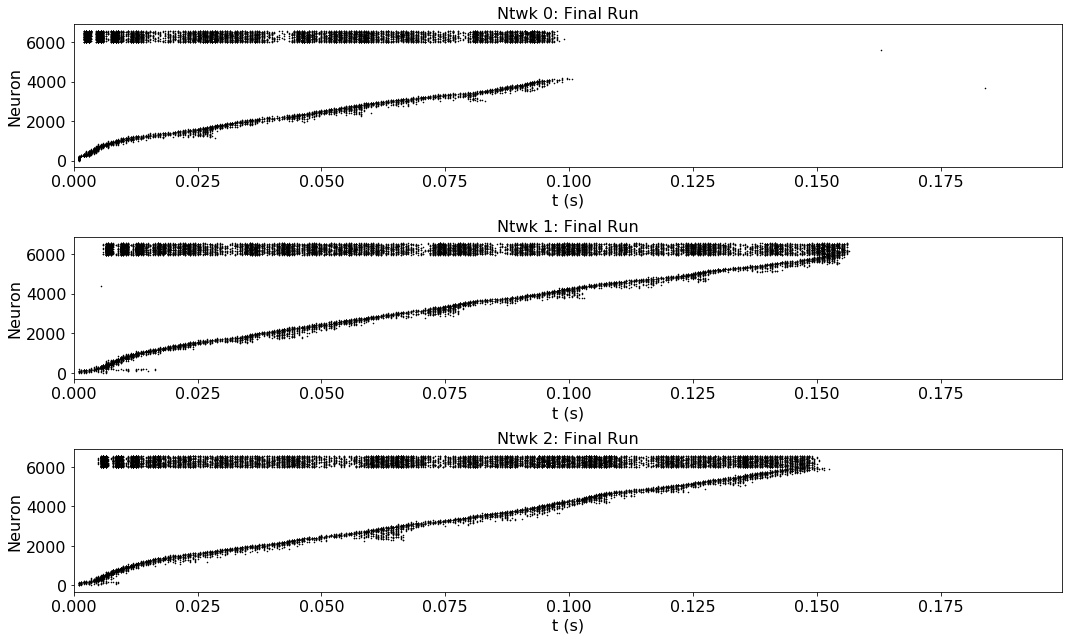

In [34]:
embedded_viz.raster(765, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

### Parameter analysis

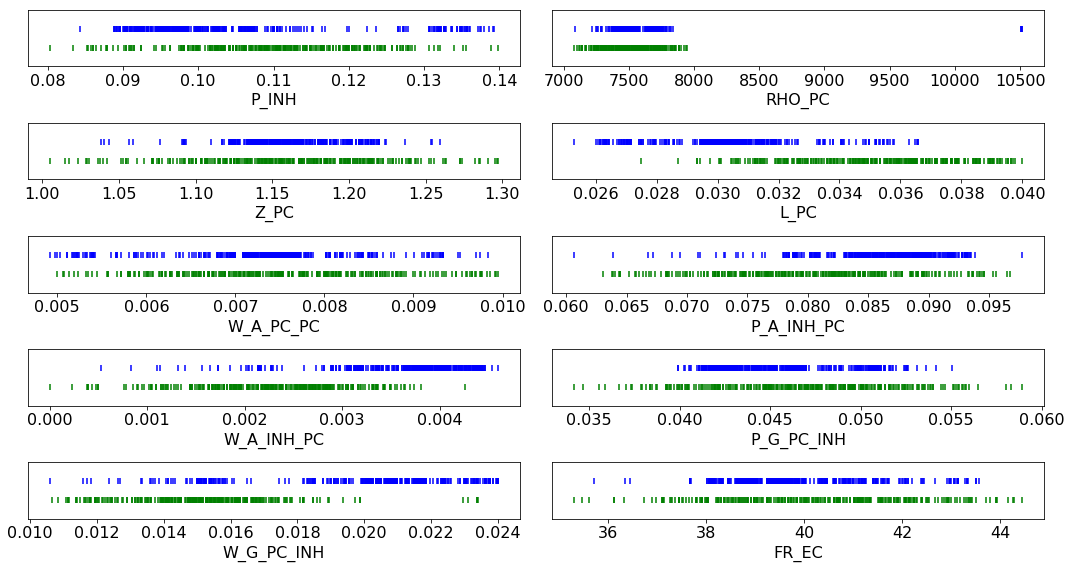

In [8]:
ridge_viz.trial_set_scatter(
    smln_id='smln_2',
    filts=[
        [T.stability > 0.5, T.speed < 12],
        [T.stability > 0.5, T.speed >= 20],
    ], cs=('b', 'g'), lmt=1000, s=30, marker='|', seed=0);